Fashion MNIST 데이터셋으로 Confusion Matrix를 그려봅시다


In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# fashion mnist로 비교해봅시다

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']     

num_classes = len(class_names)

In [ ]:
epochs = 10

y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_true = y_test
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

x_train = np.expand_dims(x_train, axis=3)
x_test = np.expand_dims(x_test, axis=3)

x_train = x_train/255
x_test = x_test/255

from tensorflow.keras import layers, models

model = models.Sequential()
model.add(layers.Conv2D(32,(5,5), padding='valid', activation='relu', input_shape=(28,28,1)))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Conv2D(64,(5,5), padding='valid', activation='relu'))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 1024)              1049600   
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)             

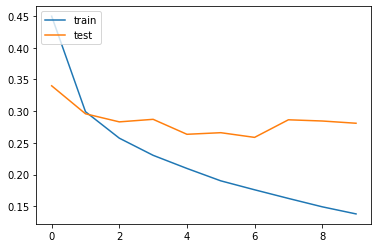

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
y_pred.shape

(10000, 10)

In [ ]:
y_pred[0]

array([5.3836786e-11, 6.7527747e-11, 1.0359006e-09, 1.8142153e-11,
       4.9876264e-10, 9.2289767e-08, 1.4149922e-10, 2.5817963e-06,
       6.6049800e-12, 9.9999738e-01], dtype=float32)

In [ ]:
y_pred = tf.argmax(y_pred, axis=-1)

In [ ]:
y_pred.shape

TensorShape([10000])

텐서플로우에 confusion_matrix 함수를 통해 매트릭스로 출력합니다. 

multi classification의 경우에는 confusion matrix를 통해 알아보기 쉽게 시각화 할 수 있습니다 .

In [ ]:
confusion_mtx = tf.math.confusion_matrix(y_true, y_pred) 


https://www.tensorflow.org/api_docs/python/tf/math/confusion_matrix

In [ ]:
confusion_mtx

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[856,   1,  15,  10,   2,   1, 110,   0,   5,   0],
       [  1, 983,   1,   5,   2,   0,   6,   0,   2,   0],
       [ 20,   0, 862,   9,  36,   0,  71,   0,   2,   0],
       [ 12,  12,  10, 918,  16,   0,  31,   0,   1,   0],
       [  1,   0,  78,  29, 803,   0,  89,   0,   0,   0],
       [  0,   0,   0,   0,   0, 981,   0,  10,   3,   6],
       [ 92,   1,  44,  21,  41,   0, 796,   0,   5,   0],
       [  0,   0,   0,   0,   0,  10,   0, 974,   0,  16],
       [  3,   1,   3,   3,   3,   1,   3,   0, 982,   1],
       [  1,   0,   0,   0,   0,   6,   0,  27,   0, 966]], dtype=int32)>

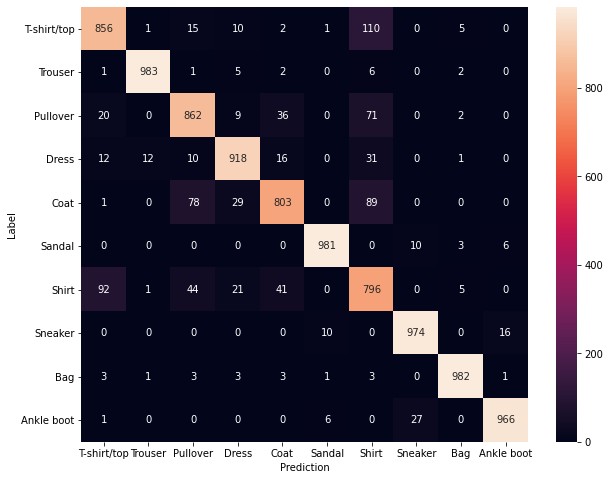

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx, xticklabels=class_names, yticklabels=class_names, 
            annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()

seaborn heatmap 

https://seaborn.pydata.org/generated/seaborn.heatmap.html

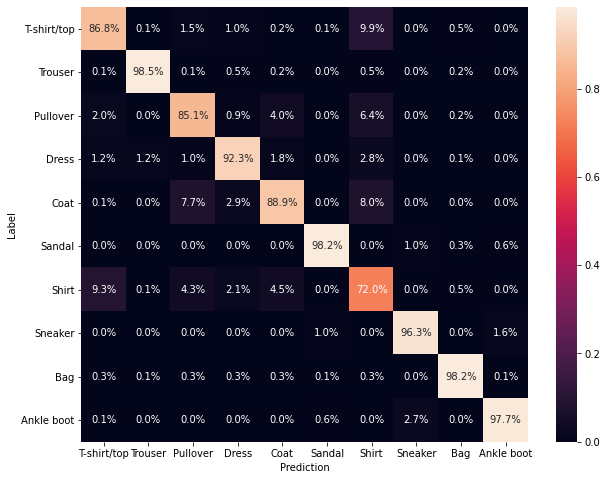

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(confusion_mtx/sum(confusion_mtx), xticklabels=class_names, yticklabels=class_names, 
            annot=True, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.show()